In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, pylab as pl 

In [2]:
# read in the training and testing data
# Substitute with the helper functions later 
df_tr = pd.read_csv("train.csv")[0:200]
n_col = len(df_tr.columns)

In [3]:
aux = df_tr==-999

for i in np.arange(200):
    if any(aux.iloc[i]):
        df_tr = df_tr.drop(i)


In [4]:
df_tr.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
11,100011,b,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,...,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
23,100023,s,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,...,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009


In [5]:
len(df_tr)

54

In [6]:
df_tr.columns

Index(['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [7]:
# Get the number of unique elements for each feature  
df_tr.nunique()

Id                             54
Prediction                      2
DER_mass_MMC                   54
DER_mass_transverse_met_lep    54
DER_mass_vis                   54
DER_pt_h                       54
DER_deltaeta_jet_jet           54
DER_mass_jet_jet               54
DER_prodeta_jet_jet            54
DER_deltar_tau_lep             54
DER_pt_tot                     54
DER_sum_pt                     54
DER_pt_ratio_lep_tau           54
DER_met_phi_centrality         48
DER_lep_eta_centrality         44
PRI_tau_pt                     54
PRI_tau_eta                    54
PRI_tau_phi                    53
PRI_lep_pt                     54
PRI_lep_eta                    54
PRI_lep_phi                    54
PRI_met                        54
PRI_met_phi                    54
PRI_met_sumet                  54
PRI_jet_num                     2
PRI_jet_leading_pt             54
PRI_jet_leading_eta            54
PRI_jet_leading_phi            53
PRI_jet_subleading_pt          54
PRI_jet_sublea

In [8]:
df_tr['Prediction'].unique()
# Create a dictionary to replace values of Prediction with numerical values 
dict_tr = dict(s=1, b=0)

# Apply the dictionary to the dataset 
df_tr = df_tr.replace(dict_tr, regex=True).astype(int)
df_tr.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,1,138,51,97,27,0,124,2,3,...,0,258,2,67,2,0,46,1,-2,113
5,100005,0,89,13,59,116,2,284,0,1,...,2,282,3,90,-2,0,56,0,3,193
6,100006,1,148,28,107,106,0,158,0,2,...,-1,294,2,123,0,1,56,0,-2,179
11,100011,0,114,10,75,30,2,252,-1,2,...,2,290,3,76,0,0,56,1,-2,165
23,100023,1,141,0,111,174,1,364,0,1,...,0,454,2,195,1,1,82,0,-2,278


/Users/virginiabordignon/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


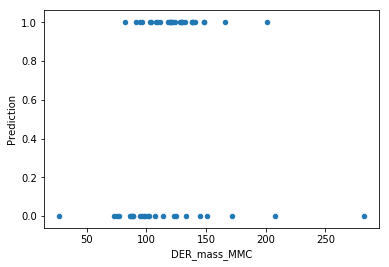

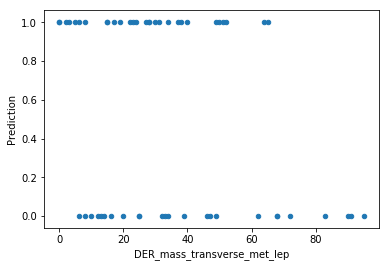

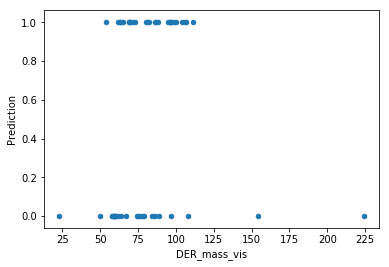

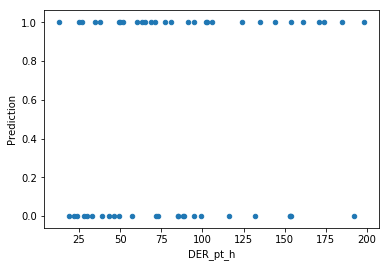

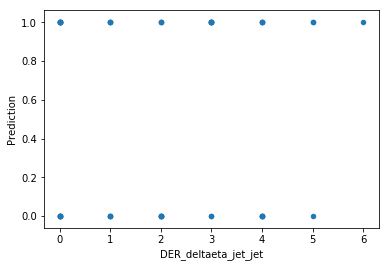

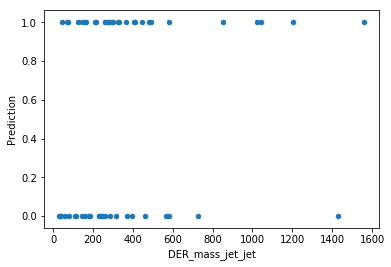

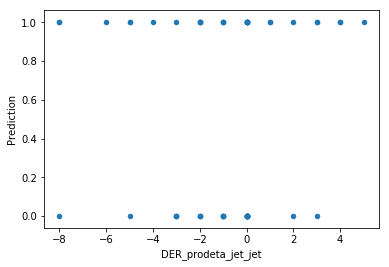

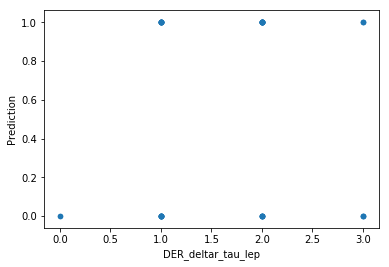

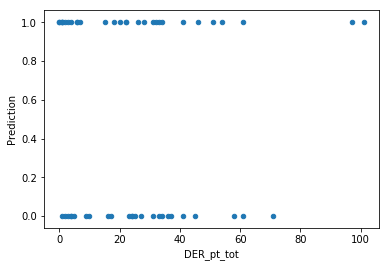

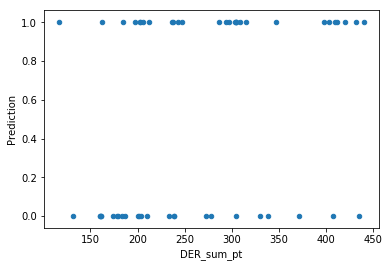

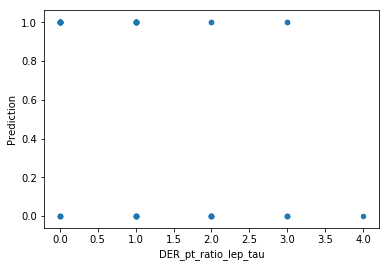

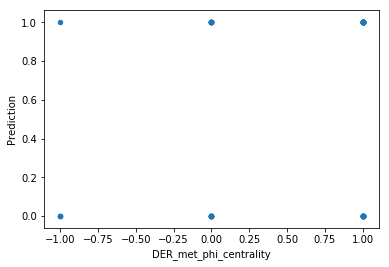

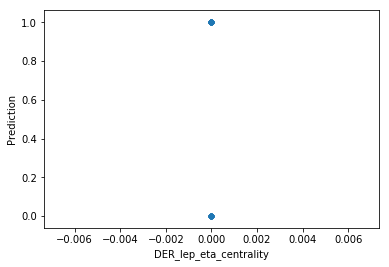

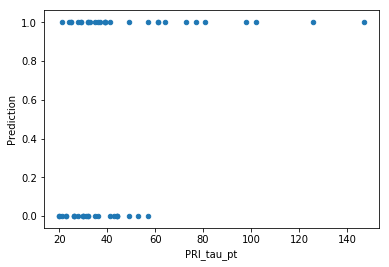

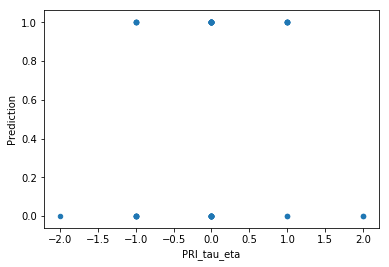

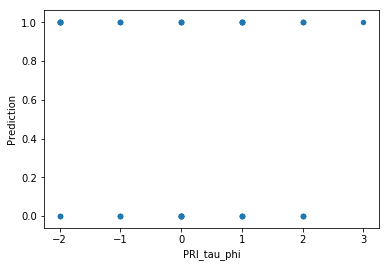

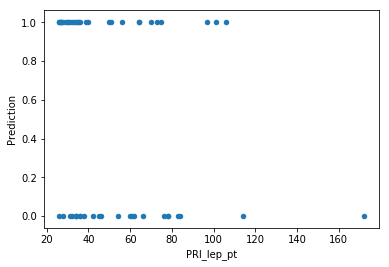

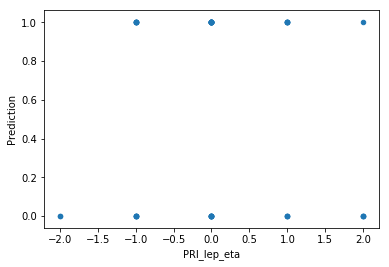

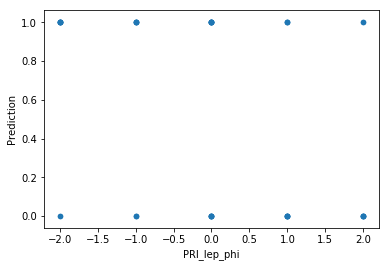

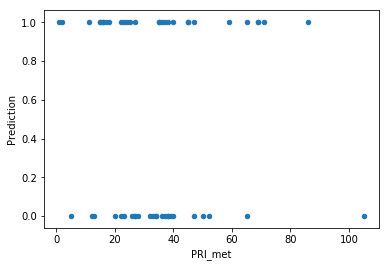

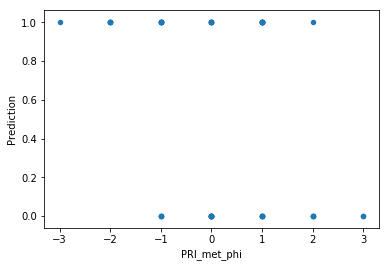

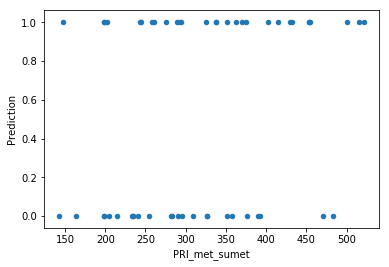

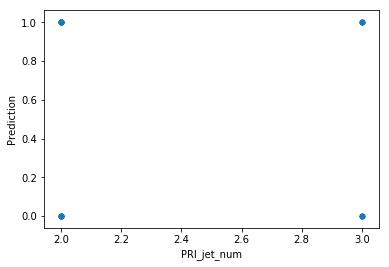

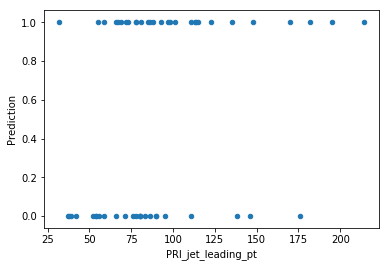

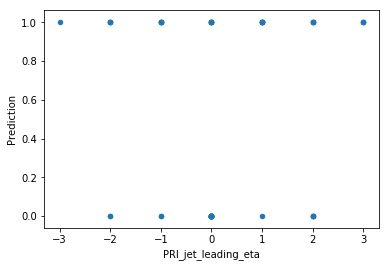

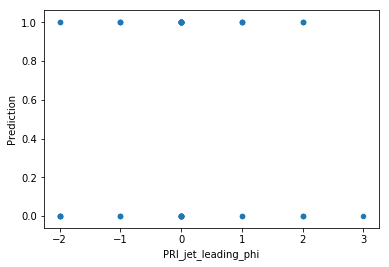

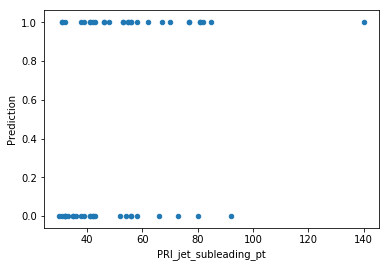

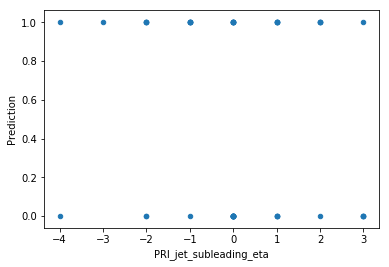

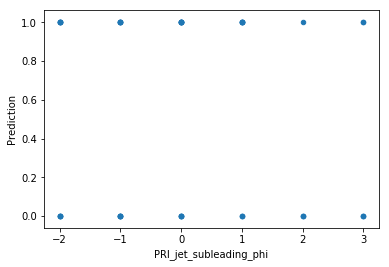

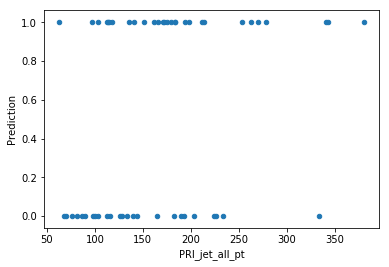

In [9]:
for i in df_tr.columns[2:]:
    df_tr.plot.scatter(x=i, y='Prediction')



In [12]:
df_m = np.mean(df_tr,0)
df_st = np.std(df_tr,0)

In [22]:
df_tr_stand = df_tr.copy()
df_tr_stand.iloc[:, 2:] = (df_tr_stand.iloc[:, 2:] - df_m[2:])/df_st

In [24]:
df_tr_stand.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,1,0.486356,0.683746,0.565177,-1.188050,-1.198772,-0.724618,1.063124,1.820651,...,-0.099263,-0.613935,-0.736788,-0.617092,1.306783,0.000000,-0.334209,0.563687,-1.285439,-0.749532
5,100005,0,-0.803122,-0.852998,-0.772474,0.576402,-0.021796,-0.249675,0.354375,-0.836515,...,1.432228,-0.369717,1.357242,-0.052296,-1.573473,0.000000,0.152241,-0.045095,1.988792,0.326566
6,100006,1,0.749515,-0.246388,0.917190,0.378149,-1.198772,-0.623693,0.354375,0.492068,...,-0.865009,-0.247609,-0.736788,0.758064,-0.133345,0.854242,0.152241,-0.045095,-1.285439,0.138249
11,100011,0,-0.145225,-0.974320,-0.209252,-1.128574,-0.021796,-0.344664,0.000000,0.492068,...,1.432228,-0.288312,1.357242,-0.396085,-0.133345,0.000000,0.152241,0.563687,-1.285439,-0.050068
23,100023,1,0.565304,-1.378726,1.057996,1.726270,-0.610284,-0.012203,0.354375,-0.836515,...,-0.099263,1.380505,-0.736788,2.526121,0.586719,0.854242,1.417011,-0.045095,-1.285439,1.469920


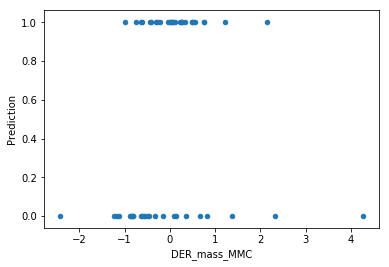

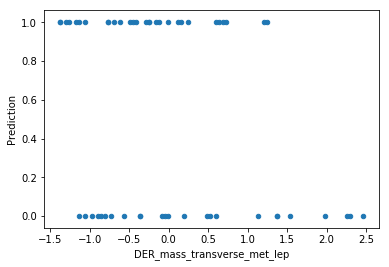

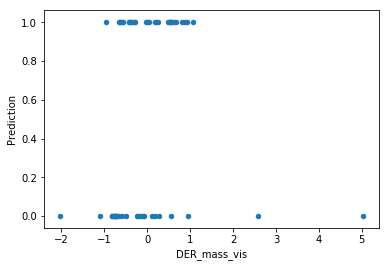

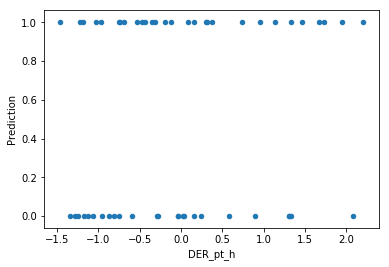

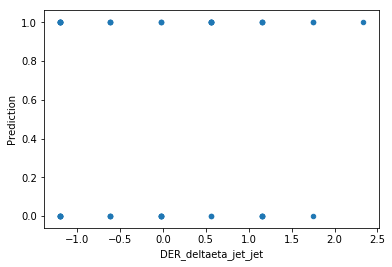

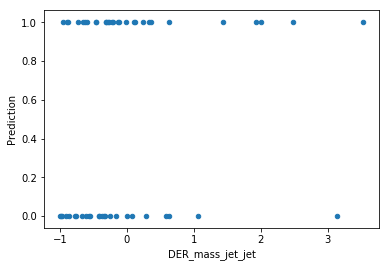

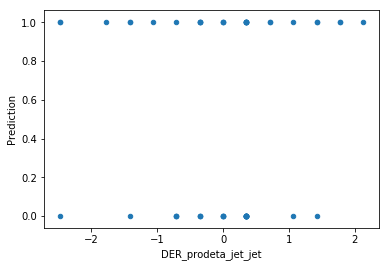

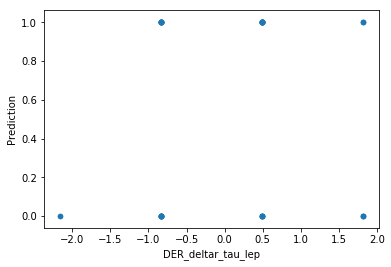

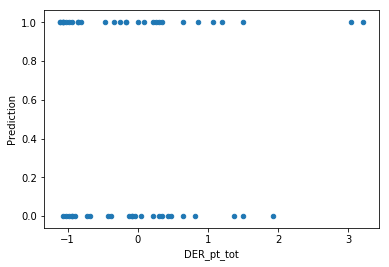

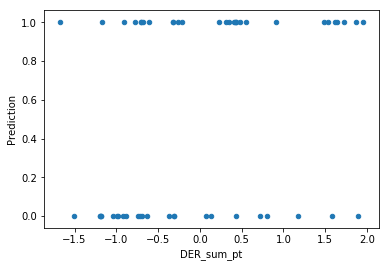

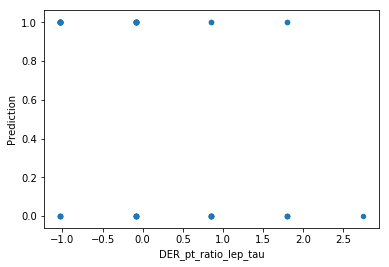

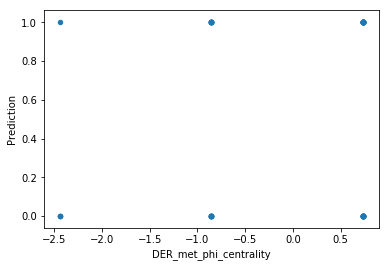

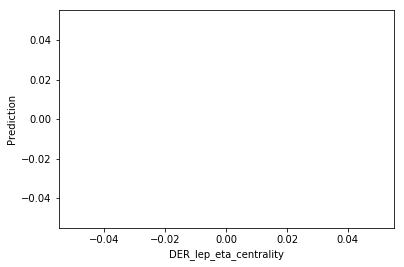

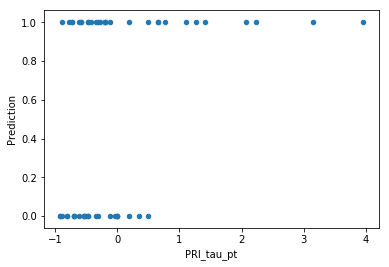

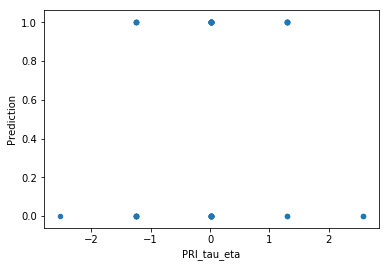

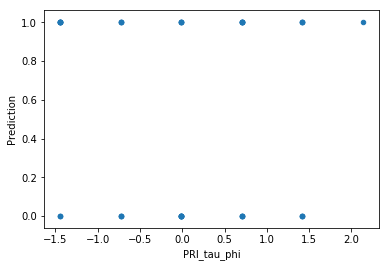

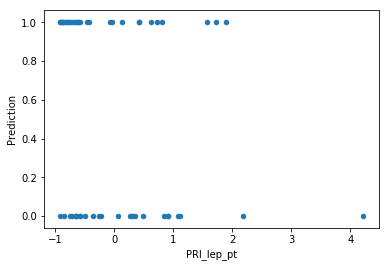

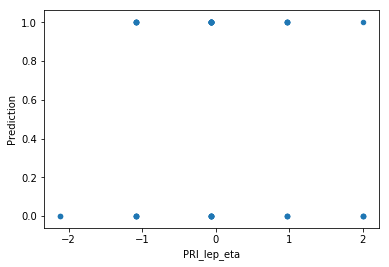

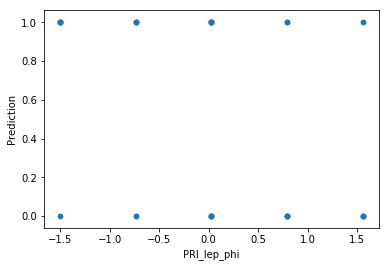

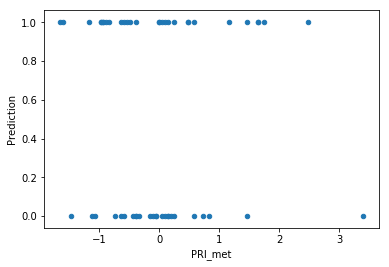

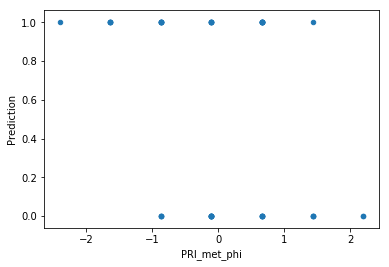

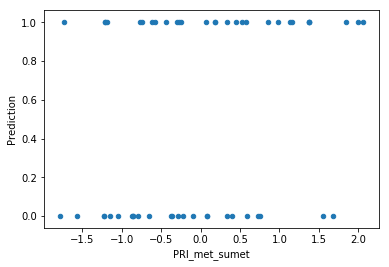

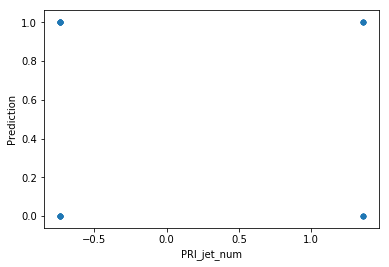

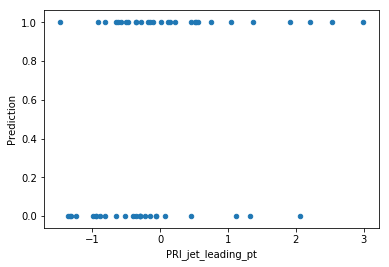

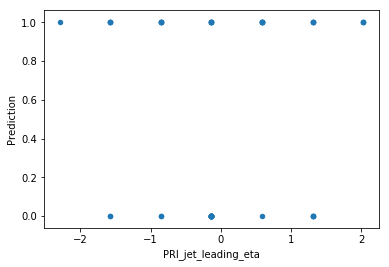

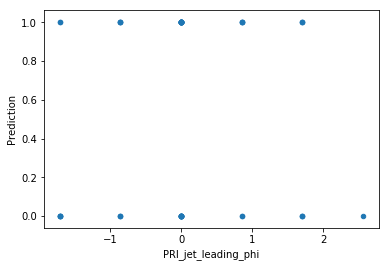

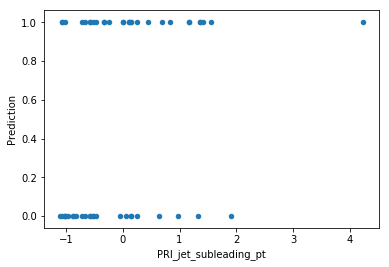

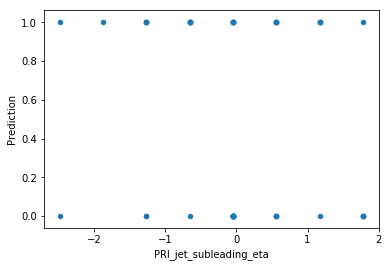

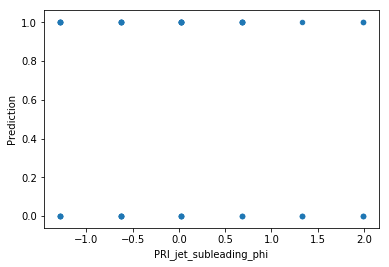

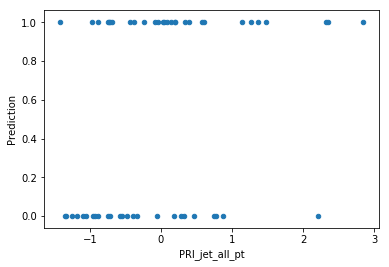

In [27]:
for i in df_tr_stand.columns[2:]:
    df_tr_stand.plot.scatter(x=i, y='Prediction')
